In [3]:
conda list

# packages in environment at D:\necessarysoftware\anaconda\envs\kerasgpu:
#
# Name                    Version                   Build  Channel
_tflow_select             2.1.0                       gpu    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
absl-py                   0.9.0                    py37_0    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
astor                     0.8.0                    py37_0    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
astroid                   2.4.1                    pypi_0    pypi
attrs                     19.3.0                     py_0    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
audioread                 2.1.8                    pypi_0    pypi
backcall                  0.1.0                    py37_0    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
blas                      1.0                         mkl    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
bleach                 

# 1 data analysis :  Check audio waveform and frequency diagram, Analysis difference .


scikit-image              0.16.2           py37h47e9c7a_0    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
scikit-learn              0.22.1           py37h6288b17_0    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
scipy                     1.4.1            py37h9439919_0    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
send2trash                1.5.0                    py37_0    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
setuptools                46.2.0                   py37_0    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
sip                       4.19.8           py37h6538335_0    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
six                       1.14.0                   py37_0    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
soundfile                 0.10.3.post1             pypi_0    pypi
sqlite                    3.31.1               h2a8f88b_1    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/ma

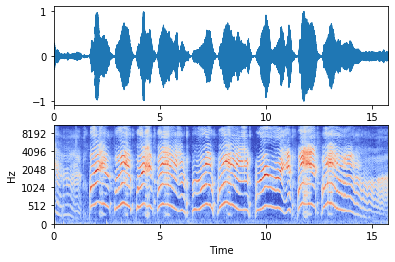

In [4]:
# awake： Constant crying
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load('./data/train/awake/awake_0.wav',sr=None)
print(sr)
plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr)
melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512, n_mels=128)

logmelspec = librosa.power_to_db(melspec)
plt.subplot(2, 1, 2)
librosa.display.specshow(logmelspec, sr=sr, x_axis='time', y_axis='mel')


16000


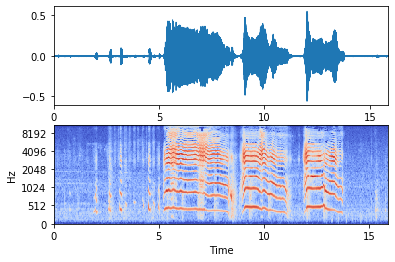

In [5]:
# diaper: Make a loud noise after a period of calm
y, sr = librosa.load('./data/train/diaper/diaper_1.wav',sr=None)
print(sr)
plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr)
melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512, n_mels=128)

logmelspec = librosa.power_to_db(melspec)
plt.subplot(2, 1, 2)
librosa.display.specshow(logmelspec, sr=sr, x_axis='time', y_axis='mel')


16000


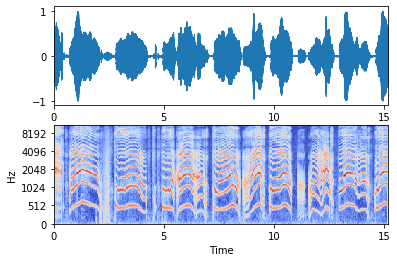

In [6]:
# hug: Cry very similar to awake
y, sr = librosa.load('./data/train/hug/hug_2.wav',sr=None)
print(sr)
plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr)
melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512, n_mels=128)

logmelspec = librosa.power_to_db(melspec)
plt.subplot(2, 1, 2)
librosa.display.specshow(logmelspec, sr=sr, x_axis='time', y_axis='mel')

16000


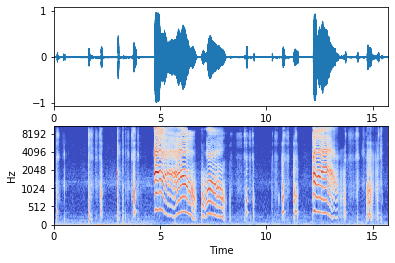

In [7]:
# hungry: Continuous crying, but there is an increasing trend
y, sr = librosa.load('./data/train/hungry/hungry_2.wav',sr=None)
print(sr)
plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr)
melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512, n_mels=128)

logmelspec = librosa.power_to_db(melspec)
plt.subplot(2, 1, 2)
librosa.display.specshow(logmelspec, sr=sr, x_axis='time', y_axis='mel')

16000


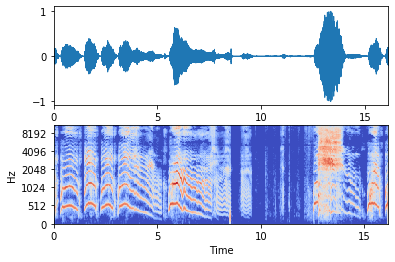

In [8]:
# sleepy: Continuously crying but the voice is lower
y, sr = librosa.load('./data/train/sleepy/sleepy_2.wav',sr=None)
print(sr)
plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr)
melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512, n_mels=128)

logmelspec = librosa.power_to_db(melspec)
plt.subplot(2, 1, 2)
librosa.display.specshow(logmelspec, sr=sr, x_axis='time', y_axis='mel')

44100


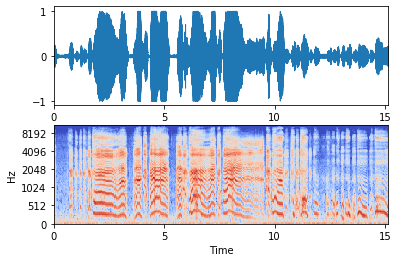

In [9]:
# uncomfortable: The fastest Continuously crying 
y, sr = librosa.load('./data/train/uncomfortable/uncomfortable_4.wav',sr=None)
print(sr)
plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr)
melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512, n_mels=128)

logmelspec = librosa.power_to_db(melspec)
plt.subplot(2, 1, 2)
librosa.display.specshow(logmelspec, sr=sr, x_axis='time', y_axis='mel')

# 2   Explore the size and distribution of data

In [10]:
# Sampling rate distribution
from tqdm import tqdm
import numpy as np
import wave
import pandas as pd
from keras.utils import to_categorical

DATA_PATH = './data/train/'

def get_labels(path=DATA_PATH):
    labels = os.listdir(path)
    #print(labels)
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)

labels, _, _ = get_labels(DATA_PATH)
i = 0
mfcc_vectors = []
for label in labels:
    wavfiles = [DATA_PATH + label + '/' + wavfile for wavfile in os.listdir(DATA_PATH + '/' + label)]
    #print(wavfiles)
    for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
        data = wave.open(wavfile, mode = 'rb')
        params = data.getparams()
        
        number = params[2]
        #print(number)
        mfcc_vectors.append(number)
    #print(mfcc_vectors)
plt.bar(range(918),mfcc_vectors)
plt.show()
        


Using TensorFlow backend.
Saving vectors of label - 'uncomfortable': 100%|██████████| 158/158 [00:00<00:00, 4526.52it/s]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

Saving vectors of label - 'uncomfortable':   0%|          | 0/158 [00:00<?, ?it/s]./data/train/diaper/diaper_29.wav
./data/train/uncomfortable/uncomfortable_128.wav
./data/train/uncomfortable/uncomfortable_75.wav
Saving vectors of label - 'uncomfortable': 100%|██████████| 158/158 [00:00<00:00, 4168.92it/s]


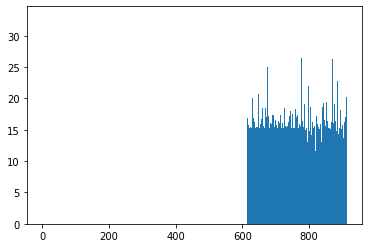

In [11]:
# train dataset: Time length distribution
from tqdm import tqdm
import numpy as np
import wave
import pandas as pd
from keras.utils import to_categorical

DATA_PATH = './data/train/'

def get_labels(path=DATA_PATH):
    labels = os.listdir(path)
    #print(labels)
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)

labels, _, _ = get_labels(DATA_PATH)
i = 0
mfcc_vectors = []
for label in labels:
    wavfiles = [DATA_PATH + label + '/' + wavfile for wavfile in os.listdir(DATA_PATH + '/' + label)]
    #print(wavfiles)
    for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
        data = wave.open(wavfile, mode = 'rb')
        params = data.getparams()
        
        number = params[3]/params[2]
        #print(number)
        if number<11:
            print(wavfile)
        mfcc_vectors.append(number)
    #print(mfcc_vectors)
plt.bar(range(913),mfcc_vectors)
plt.show()
        


100%|██████████| 228/228 [00:00<00:00, 4233.61it/s]
./data/test/test_196.wav
./data/test/test_212.wav
[15.85, 16.782267573696146, 17.6, 15.185125, 17.39174603174603, 16.213333333333335, 15.85, 17.802, 15.3476875, 15.4993125, 17.976, 16.3505, 28.255375, 28.0845, 14.133922902494332, 16.822857142857142, 15.8713125, 28.1165, 14.92061224489796, 15.743375, 15.86725, 15.371625, 15.595419501133787, 15.7966875, 15.743125, 17.1704375, 16.949875, 21.455238095238094, 18.6453125, 15.905759637188208, 15.36, 15.3476875, 13.850884353741497, 25.386, 18.065125, 19.63175, 17.031125, 15.418, 16.457142857142856, 19.353125, 16.49775, 12.932154195011337, 23.2425, 25.386, 26.346, 15.7433125, 22.5706875, 15.8671875, 15.185125, 28.0845625, 20.1078125, 21.76, 16.49775, 12.5181179138322, 15.74312925170068, 15.3476875, 15.2323125, 16.095375, 17.51875, 29.9181875, 16.3693125, 15.541156462585034, 15.696, 19.353125, 21.2586875, 15.03425, 15.3135625, 15.946, 15.0341875, 26.346, 16.362, 18.944, 14.691904761904762, 16.7

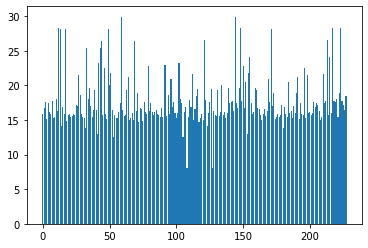

In [12]:
# train dataset: Time length distribution
from tqdm import tqdm
import numpy as np
import wave
import pandas as pd
from keras.utils import to_categorical

DATA_PATH = './data/test/'




mfcc_vectors = []

wavfiles = [DATA_PATH + wavfile for wavfile in os.listdir(DATA_PATH)]
#print(wavfiles)
for wavfile in tqdm(wavfiles):
    data = wave.open(wavfile, mode = 'rb')
    params = data.getparams()
    
    number = params[3]/params[2]
    if number<10:
        print(wavfile)
    #print(number)
    mfcc_vectors.append(number)
print(mfcc_vectors)
plt.bar(range(228),mfcc_vectors)
plt.show()
        


# 1 baseline  mfcc + {cnn,resnet,xception} + 五折验证

In [ ]:
import librosa
from Resnet import ResNet50
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
from tqdm import tqdm

from keras.models import load_model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from CNNdataset import mini_XCEPTION,tiny_XCEPTION
DATA_PATH = './data/train/'

def get_labels(path=DATA_PATH):
    labels = os.listdir(path)
    print(labels)
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)


def wav2mfcc(file_path):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    mfcc = librosa.feature.mfcc(wave, sr=16000)
    print(mfcc.shape)
    return mfcc


def save_data_to_array(path=DATA_PATH):
    labels, _, _ = get_labels(path)

    for label in labels:
        mfcc_vectors = []
        
        wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
        print(wavfiles)
        for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            mfcc = np.zeros((20, 400))
            mfcc_feat = wav2mfcc(wavfile)[:, :400]
            mfcc[:, :mfcc_feat.shape[1]] = mfcc_feat
            mfcc_vectors.append(mfcc)
         
        mfcc_vectors = np.stack(mfcc_vectors)
            
        
        np.save(label + '.npy', mfcc_vectors)

        
DATA_TEST_PATH = './data/test'
def save_data_to_array_test(path=DATA_TEST_PATH):
    mfcc_vectors = []
        
    wavfiles = [DATA_TEST_PATH + '/' + wavfile for wavfile in os.listdir(DATA_TEST_PATH)]
    for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format('test')):
        mfcc = np.zeros((20, 400))
        mfcc_feat = wav2mfcc(wavfile)[:, :400]
        mfcc[:, :mfcc_feat.shape[1]] = mfcc_feat
        mfcc_vectors.append(mfcc)
            
    mfcc_vectors = np.stack(mfcc_vectors)
    np.save('test.npy', mfcc_vectors)
        

def get_train_test(split_ratio=0.8, random_state=42):
    labels, indices, _ = get_labels(DATA_PATH)


    X = np.load(labels[0] + '.npy')
    y = np.zeros(X.shape[0])


    for i, label in enumerate(labels[1:]):
        x = np.load(label + '.npy')
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    return X, y
    # return train_test_split(X, y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(20, 400, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model




feature_dim_2 = 32


#save_data_to_array()
#save_data_to_array_test()

X, Y = get_train_test()
skf = StratifiedKFold(n_splits=5)

test_pred = np.zeros((228, 6))
for idx, (tr_idx, val_idx) in enumerate(skf.split(X, Y)):
    print(idx)

    feature_dim_1 = 20
    channel = 1
    epochs = 100
    batch_size = 8
    verbose = 1
    num_classes = 6

    X_train, X_test = X[tr_idx], X[val_idx]
    y_train, y_test = Y[tr_idx], Y[val_idx]
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], channel) / 255.0
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], channel) / 255.0

    y_train_hot = to_categorical(y_train)
    y_test_hot = to_categorical(y_test)
    if idx==1 or idx ==4 :
        model = get_model()
    if idx==2 or idx ==0:
        model = tiny_XCEPTION((20, 400, 1), 6)
    if idx==3:
        model = model = ResNet50(input_shape=(20, 400, 1), classes=6)

    model.summary()   
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    my_callbacks = [
        keras.callbacks.EarlyStopping(patience=30),
        keras.callbacks.ModelCheckpoint(filepath='model-{0}.h5'.format(idx), save_best_only=True),
    ]

    model.fit(X_train, y_train_hot, 
              batch_size=batch_size,   
              epochs=epochs, 
              verbose=verbose, 
              validation_data=(X_test, y_test_hot),
              callbacks=my_callbacks
             )


test_pred = np.zeros((228, 6))
for path in ['model-0.h5', 'model-1.h5', 'model-2.h5','model-3.h5','model-4.h5'][:5]:
    model=load_model(path)
    print(path)
    X_test = np.load('test.npy') / 255.0
    test_pred += model.predict(X_test.reshape(228, 20, 400, 1))



wavfiles = [wavfile for wavfile in os.listdir(DATA_TEST_PATH)]   

import pandas as pd
df = pd.DataFrame()

df['id'] = [wavfile for wavfile in os.listdir(DATA_TEST_PATH)]
df['label'] = [['awake','diaper','hug', 'hungry','sleepy', 'uncomfortable'][x] for x in test_pred.argmax(1)]
df.to_csv('tmp225.csv', index=None)

# 2 MFCC+ （cnn,resnet + xception）+ merge + 5 vali

In [ ]:
import librosa
from Resnet import ResNet50
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
from tqdm import tqdm

from keras.models import load_model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from CNNdataset import mini_XCEPTION,tiny_XCEPTION
DATA_PATH = './data/train/'

def get_labels(path=DATA_PATH):
    labels = os.listdir(path)
    print(labels)
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)


def wav2mfcc(file_path):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    mfcc = librosa.feature.mfcc(wave, sr=16000)
    print(mfcc.shape)
    return mfcc


def save_data_to_array(path=DATA_PATH):
    labels, _, _ = get_labels(path)

    for label in labels:
        mfcc_vectors = []
        
        wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
        print(wavfiles)
        for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            mfcc = np.zeros((20, 400))
            mfcc_feat = wav2mfcc(wavfile)[:, :400]
            mfcc[:, :mfcc_feat.shape[1]] = mfcc_feat
            mfcc_vectors.append(mfcc)
         
        mfcc_vectors = np.stack(mfcc_vectors)
            
        
        np.save(label + '.npy', mfcc_vectors)

        
DATA_TEST_PATH = './data/test'
def save_data_to_array_test(path=DATA_TEST_PATH):
    mfcc_vectors = []
        
    wavfiles = [DATA_TEST_PATH + '/' + wavfile for wavfile in os.listdir(DATA_TEST_PATH)]
    for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format('test')):
        mfcc = np.zeros((20, 400))
        mfcc_feat = wav2mfcc(wavfile)[:, :400]
        mfcc[:, :mfcc_feat.shape[1]] = mfcc_feat
        mfcc_vectors.append(mfcc)
            
    mfcc_vectors = np.stack(mfcc_vectors)
    np.save('test.npy', mfcc_vectors)
        

def get_train_test(split_ratio=0.8, random_state=42):
    labels, indices, _ = get_labels(DATA_PATH)


    X = np.load(labels[0] + '.npy')
    y = np.zeros(X.shape[0])


    for i, label in enumerate(labels[1:]):
        x = np.load(label + '.npy')
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    return X, y
    # return train_test_split(X, y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)
def simpleCNN(input1):
    
    x= (Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(20, 400, 1)))(input1)
    x=(Conv2D(48, kernel_size=(2, 2), activation='relu'))(x)
    x=(Conv2D(128, kernel_size=(2, 2), activation='relu'))(x)
    x=(MaxPooling2D(pool_size=(2, 2)))(x)
    x=(Flatten())(x)
    #x=(Dropout(0.25))(x)
    output=(Dense(1024, activation='relu'))(x)
    model = Model(input1, output)
    return model



gram_rows = 20
gram_cols = 400
gram_depth = 1
def multi_input_model():
    """构建多输入模型"""


    
    input1 = Input(shape = (gram_rows,gram_cols,gram_depth),name='input1')
    
    model1 = simpleCNN(input1)
    output1 = model1(input1)

    input2 = Input(shape = (gram_rows,gram_cols,gram_depth),name='input2')
    model2 = simpleCNN(input2)
    output2 = model2(input4) 


    input3 = Input(shape = (gram_rows,gram_cols,gram_depth),name='input3')
    model3 = ResNet50(input3, classes=6)
    output3 = model3(input3)

    

    x1 = Multiply()([output1,output2，output3])
    x =  Dense(1024, activation='relu')(x1)
    x = (Dropout(0.25))(x)
    x =  Dense(64, activation='relu')(x)
    #x1 = Add()([output1,output4])
    #print(K.int_shape(x1))
    category_predict1 = Dense(6, activation='softmax', name='ctg_out_1')(x1)

  
    model = Model(inputs=[input1, input2, input3], outputs=[category_predict1])
    model.summary()
  
    return model

feature_dim_2 = 32


#save_data_to_array()
#save_data_to_array_test()

X, Y = get_train_test()
skf = StratifiedKFold(n_splits=5)

test_pred = np.zeros((228, 6))
for idx, (tr_idx, val_idx) in enumerate(skf.split(X, Y)):
    print(idx)

    feature_dim_1 = 20
    channel = 1
    epochs = 100
    batch_size = 8
    verbose = 1
    num_classes = 6

    X_train, X_test = X[tr_idx], X[val_idx]
    y_train, y_test = Y[tr_idx], Y[val_idx]
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], channel) / 255.0
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], channel) / 255.0

    y_train_hot = to_categorical(y_train)
    y_test_hot = to_categorical(y_test)

    model = multi_input_model()


    model.summary()   
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    my_callbacks = [
        keras.callbacks.EarlyStopping(patience=30),
        keras.callbacks.ModelCheckpoint(filepath='model-{0}.h5'.format(idx), save_best_only=True),
    ]

    model.fit([X_train,X_train,X_train], y_train_hot, 
              batch_size=batch_size,   
              epochs=epochs, 
              verbose=verbose, 
              validation_data=([X_test,X_test,X_test], y_test_hot),
              callbacks=my_callbacks
             )


test_pred = np.zeros((228, 6))
for path in ['model-0.h5', 'model-1.h5', 'model-2.h5','model-3.h5','model-4.h5'][:5]:
    model=load_model(path)
    print(path)
    X_test = np.load('test.npy') / 255.0
    test_pred += model.predict(X_test.reshape(228, 20, 400, 1))



wavfiles = [wavfile for wavfile in os.listdir(DATA_TEST_PATH)]   

import pandas as pd
df = pd.DataFrame()

df['id'] = [wavfile for wavfile in os.listdir(DATA_TEST_PATH)]
df['label'] = [['awake','diaper','hug', 'hungry','sleepy', 'uncomfortable'][x] for x in test_pred.argmax(1)]
df.to_csv('tmp225.csv', index=None)

#  baseline  ： 数据平移，之后用双向lstm分类

In [13]:
# Preprocessing parameters
sr = 16000 # Sampling rate
duration = 15
hop_length = 347 # to make time steps 128
fmin = 20
fmax = sr // 2
n_mels = 128
n_fft = n_mels * 20
samples = sr * duration

def read_audio(path):
    '''
    Reads in the audio file and returns
    an array that we can turn into a melspectogram
    '''
    y, _ = librosa.core.load(path, sr=16000)
    # trim silence
    if 0 < len(y): # workaround: 0 length causes error
        y, _ = librosa.effects.trim(y)
    if len(y) > samples: # long enough
        y = y[0:0+samples]
    else: # pad blank
        padding = samples - len(y)
        offset = padding // 2
        y = np.pad(y, (offset, samples - len(y) - offset), 'constant')
    return y

def audio_to_melspectrogram(audio):
    '''
    Convert to melspectrogram after audio is read in
    '''
    spectrogram = librosa.feature.melspectrogram(audio, 
                                                 sr=sr,
                                                 n_mels=n_mels,
                                                 hop_length=hop_length,
                                                 n_fft=n_fft,
                                                 fmin=fmin,
                                                 fmax=fmax)
    return librosa.power_to_db(spectrogram).astype(np.float32)

def read_as_melspectrogram(path):
    '''
    Convert audio into a melspectrogram 
    so we can use machine learning
    '''
    mels = audio_to_melspectrogram(read_audio(path))
    return mels

def convert_wav_to_image(df, path):
    X = []
    for _,row in tqdm_notebook(df.iterrows()):
        x = read_as_melspectrogram('{}/{}'.format(path[0],
                                                  str(row['fname'])))
        X.append(x.transpose())
    return X

def normalize(img):
    '''
    Normalizes an array 
    (subtract mean and divide by standard deviation)
    '''
    eps = 0.001
    if np.std(img) != 0:
        img = (img - np.mean(img)) / np.std(img)
    else:
        img = (img - np.mean(img)) / eps
    return img

def normalize_dataset(X):
    '''
    Normalizes list of arrays
    (subtract mean and divide by standard deviation)
    '''
    normalized_dataset = []
    for img in X:
        normalized = normalize(img)
        normalized_dataset.append(normalized)
    return normalized_dataset

## Preprocess dataset and create validation sets

In [14]:
# Preprocess dataset and create validation sets

DATA_PATH = './data/train/'
def get_labels(path=DATA_PATH):
    labels = os.listdir(path)
    print(labels)
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)
def wav2mfcc(file_path):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    mfcc = librosa.feature.mfcc(wave, sr=16000)
    print(mfcc.shape)
    return mfcc


def save_data_to_array(path=DATA_PATH):
    labels, _, _ = get_labels(path)
    
    for label in labels:
        X = []
        wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
        print(wavfiles)
        for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            #mfcc = np.zeros((20, 400))
            x = read_as_melspectrogram(wavfile)
            print(x.shape)
            X.append(x.transpose())
       
        X = np.stack(X) 
        np.save(label + '.npy', X)

        
DATA_TEST_PATH = './data/test'
def save_data_to_array_test(path=DATA_TEST_PATH):
    X = []     
    wavfiles = [DATA_TEST_PATH + '/' + wavfile for wavfile in os.listdir(DATA_TEST_PATH)]
    for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format('test')):  
        x = read_as_melspectrogram(wavfile)
        print(x.shape)
        X.append(x.transpose())    
    X = np.stack(X) 
    np.save('test.npy', X)

def get_train_test(split_ratio=0.8, random_state=42):
    labels, indices, _ = get_labels(DATA_PATH)


    X = np.load(labels[0] + '.npy',allow_pickle = True)
    y = np.zeros(X.shape[0])


    for i, label in enumerate(labels[1:]):
        x = np.load(label + '.npy',allow_pickle = True)
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    return X, y
#save_data_to_array()
#save_data_to_array_test()
X, Y = get_train_test()


#X = normalize_dataset(X)
# Y = df[label_columns].values
# x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.1, random_state=seed)

['awake', 'diaper', 'hug', 'hungry', 'sleepy', 'uncomfortable']


# model 

In [39]:

import matplotlib.pyplot as plt
import gc
import time
from tqdm import tqdm, tqdm_notebook; tqdm.pandas() # Progress bar
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.model_selection import train_test_split
from keras import Input, Model
# Machine Learning
import tensorflow as tf
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import (Dense, Bidirectional, CuDNNLSTM, ELU,
                          Dropout, LeakyReLU, Conv1D, BatchNormalization,LSTM)
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')
        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)
        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)
        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(
                                shape = shape,
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     shape = shape,
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias:
            eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        if mask is not None:
            a *= K.cast(mask, K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim
# Neural network model
input_shape = (692,128)
optimizer = Adam(0.005, beta_1=0.1, beta_2=0.001, amsgrad=True)
n_classes = 6

def multi_input_model():
    input1 = Input(shape = (692,128),name='input1')
    #model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=input_shape))
    x= (Bidirectional(LSTM(256, input_shape=input_shape,return_sequences=False,name='input1')))(input1)
    #x=(Attention(256))(x)
    x=(Dropout(0.2))(x)
    x=(Dense(400))(x)
    #x=(ELU())(x)
    x=(Dropout(0.2))(x) 
    x=(Dense(n_classes, activation='softmax'))(x)
    model = Model(inputs=[input1], outputs=[x])
    model.summary()
    return model





#  train 


In [41]:

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
for idx, (tr_idx, val_idx) in enumerate(skf.split(X, Y)):
    print(idx)
    channel = 1
    epochs = 60
    batch_size = 16
    verbose = 1
    num_classes = 6

    X_train, X_test = X[tr_idx], X[val_idx]
    y_train, y_test = Y[tr_idx], Y[val_idx]
    print("1111",y_train.shape)
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2]) / 255.0
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2]) / 255.0

    y_train_hot = to_categorical(y_train)
    y_test_hot = to_categorical(y_test)
    model = multi_input_model()
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])
    es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)
    hist = model.fit(X_train, y_train_hot,
          batch_size=16,
          epochs=110,
          validation_data=(X_test, y_test_hot),
          callbacks = [es])




    model.save_weights('model-{0}.h5'.format(idx))



0
1111 (730,)
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input1 (InputLayer)          (None, 692, 128)          0         
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 512)               788480    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 400)               205200    
_________________________________________________________________
dropout_20 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 2406      
Total params: 996,086
Trainable params: 996,086
Non-trainable params: 0
_______________________________________

KeyboardInterrupt: 

## 1.5 test

# 2 baseline 2 思路：对音频裁剪扩充之后用bilstm分类

In [53]:
import librosa
from Resnet import ResNet50
import os
from scipy import signal
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
from tqdm import tqdm
from CNNdataset import mini_XCEPTION
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
DATA_PATH = './data/train/'
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(699, 128, 1)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model


def modelOne():
    input1 = Input(shape = (699,128),name='input1')
    #model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=input_shape))
    x= (Bidirectional(LSTM(256, input_shape=input_shape,return_sequences=False,name='input1')))(input1)
    #x=(Attention(256))(x)
    x=(Dense(400))(x)
    x=(Dropout(0.2))(x)
    #x=(ELU())(x)
    x=(Dropout(0.2))(x) 
    x=(Dense(n_classes, activation='softmax'))(x)
    model = Model(inputs=[input1], outputs=[x])
    model.summary()
    return model


def get_labels(path=DATA_PATH):
    labels = os.listdir(path)
    print(labels)
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)



def wav2melgraf(path):
  m_bands = 128
  s_rate = 16000
  win_length = int(0.1 * s_rate)  # Window length 15ms, 25ms, 50ms, 100ms, 200ms
  hop_length = int(0.01 * s_rate)  # Window shift  10ms
  n_fft = win_length
  y, sr = librosa.load(path, sr=s_rate)
  #进行傅里叶变换
  D = np.abs(librosa.stft(y, n_fft=n_fft, win_length=win_length, hop_length=hop_length,
                                window=signal.hamming, center=False)) ** 2
    #提取特征
  S = librosa.feature.melspectrogram(S=D, n_mels=m_bands)
  gram = librosa.power_to_db(S, ref=np.max)
  gram = np.transpose(gram, (1, 0))
  print(gram.shape)
  
  gram1 = gram[:699,:128]

  if gram1.shape[0] != 699 or gram.shape[1] != 128 :
    print("eror:!!!!",path)
  return gram1,gram


def save_data_to_array(path=DATA_PATH):
    labels, _, _ = get_labels(path)

    for label in labels:
        mfcc_vectors = []
        
        wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
        print(wavfiles)
        for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            #mfcc = np.zeros((20, 400))
            mfcc_feat,allwav = wav2melgraf(wavfile)
            #mfcc[:, :mfcc_feat.shape[1]] = mfcc_feat
            mfcc_vectors.append(mfcc_feat)
            num = int(allwav.shape[0]/699)
            print(num)
            if(num==2):
                mfcc_vectors.append(allwav[699:1398,:128])
            if(num==3):
                mfcc_vectors.append(allwav[699:1398,:128])
                mfcc_vectors.append(allwav[1398:2097,:128])
            if(num==4):
                mfcc_vectors.append(allwav[699:1398,:128])
                mfcc_vectors.append(allwav[1398:2097,:128])
                mfcc_vectors.append(allwav[2097:2796,:128])
            
         
        mfcc_vectors = np.stack(mfcc_vectors)
        np.save(label + '.npy', mfcc_vectors)

        
DATA_TEST_PATH = './data/test'
def save_data_to_array_test(path=DATA_TEST_PATH):
    mfcc_vectors = []
        
    wavfiles = [DATA_TEST_PATH + '/' + wavfile for wavfile in os.listdir(DATA_TEST_PATH)]
    for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format('test')):
        #mfcc = np.zeros((20, 400))
        mfcc_feat,wavall= wav2melgraf(wavfile)
        
        mfcc_vectors.append(mfcc_feat)
            
    mfcc_vectors = np.stack(mfcc_vectors)
    np.save('test.npy', mfcc_vectors)
        

def get_train_test(split_ratio=0.9, random_state=42):
    labels, indices, _ = get_labels(DATA_PATH)


    X = np.load(labels[0] + '.npy',allow_pickle = True)
    y = np.zeros(X.shape[0])


    for i, label in enumerate(labels[1:]):
        x = np.load(label + '.npy',allow_pickle = True)
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    return X, y


save_data_to_array()
save_data_to_array_test()

X, Y = get_train_test()
skf = StratifiedKFold(n_splits=3)

test_pred = np.zeros((228, 6))
for idx, (tr_idx, val_idx) in enumerate(skf.split(X, Y)):
    print(idx)


    channel = 1
    epochs = 50
    batch_size = 6
    verbose = 1
    num_classes = 6

    X_train, X_test = X[tr_idx], X[val_idx]
    y_train, y_test = Y[tr_idx], Y[val_idx]
    print("1111",X_train.shape)
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1) / 255.0
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1) / 255.0

    y_train_hot = to_categorical(y_train)
    y_test_hot = to_categorical(y_test)

    #model = modelOne()
    model = get_model()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    my_callbacks = [
        keras.callbacks.EarlyStopping(patience=15),
        keras.callbacks.ModelCheckpoint(filepath='model-{0}.h5'.format(idx), save_best_only=True),
    ]

    model.fit(X_train, y_train_hot, 
              batch_size=batch_size, 
              epochs=epochs, 
              verbose=verbose, 
              validation_data=(X_test, y_test_hot),
              callbacks=my_callbacks,
             )
    #model.save_weights('model-{0}.h5'.format(idx))
    


    
test_pred = np.zeros((228, 6))
for path in ['model-0.h5', 'model-1.h5', 'model-2.h5'][:3]:
    model.load_weights(path)
    print(path)
    
    X_test = np.load('test.npy') / 255.0
    test_pred += model.predict(X_test.reshape(228, 699, 128,1))



wavfiles = [wavfile for wavfile in os.listdir(DATA_TEST_PATH)]   

import pandas as pd
df = pd.DataFrame()

df['id'] = [wavfile for wavfile in os.listdir(DATA_TEST_PATH)]
df['label'] = [['awake','diaper','hug', 'hungry','sleepy', 'uncomfortable'][x] for x in test_pred.argmax(1)]
df.to_csv('tmp225.csv', index=None)

['awake', 'diaper', 'hug', 'hungry', 'sleepy', 'uncomfortable']
0
1111 (1275, 699, 128)


ResourceExhaustedError: OOM when allocating tensor with shape[2589120,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]

# 3 baseline 3 思路：先对数据进行加噪声和调声调， 然后检测开始端点进行数据的采集， 最后采用五折交叉验证提交。（模型先不确定）

In [ ]:
import librosa
from Resnet import ResNet50
import os
from scipy import signal
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
from tqdm import tqdm
from CNNdataset import mini_XCEPTION
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold

import cv2
from scipy.io import wavfile

DATA_PATH = './data/train/'


def get_labels(path=DATA_PATH):
    labels = os.listdir(path)
    print(labels)
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)


def wav2mfcc(file_path):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    mfcc = librosa.feature.mfcc(wave, sr=8000)
    print(mfcc.shape)
    return mfcc
def wav2melgraf(path):
  m_bands = 128
  s_rate = 16000
  win_length = int(0.1 * s_rate)  # Window length 15ms, 25ms, 50ms, 100ms, 200ms
  hop_length = int(0.01 * s_rate)  # Window shift  10ms
  n_fft = win_length
  y, sr = librosa.load(path, sr=s_rate)
  ly = len(y)
  y_tune = cv2.resize(y, (1, int(ly*1.2))).squeeze()
  lc = len(y_tune)-ly
  y_tune = y_tune[int(lc/2):int(lc/2)+ly]

  wn = np.random.randn(len(y))
  ynoise = np.where(y != 0.0, y + 0.02 * wn, 0.0) # 噪声不要添加到0上！np.where(condition,x,y)condition为true取x,否者取y

  #进行傅里叶变换
  D = np.abs(librosa.stft(y, n_fft=n_fft, win_length=win_length, hop_length=hop_length,
                                window=signal.hamming, center=False)) ** 2
    #提取特征
  S = librosa.feature.melspectrogram(S=D, n_mels=m_bands)
  gram = librosa.power_to_db(S, ref=np.max)
  gram = np.transpose(gram, (1, 0))
  print(gram.shape)
  
  gram1 = gram[:699,:128]

  if gram1.shape[0] != 699 or gram.shape[1] != 128 :
    print("eror:!!!!",path)
  return gram1,gram


def save_data_to_array(path=DATA_PATH):
    labels, _, _ = get_labels(path)

    for label in labels:
        mfcc_vectors = []
        
        wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
        print(wavfiles)
        for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            #mfcc = np.zeros((20, 400))
            mfcc_feat,allwav = wav2melgraf(wavfile)
            #mfcc[:, :mfcc_feat.shape[1]] = mfcc_feat
            mfcc_vectors.append(mfcc_feat)
            num = int(allwav.shape[0]/699)
            print(num)
            if(num==2):
                mfcc_vectors.append(allwav[699:1398,:128])
            if(num==3):
                mfcc_vectors.append(allwav[699:1398,:128])
                mfcc_vectors.append(allwav[1398:2097,:128])
            if(num==4):
                mfcc_vectors.append(allwav[699:1398,:128])
                mfcc_vectors.append(allwav[1398:2097,:128])
                mfcc_vectors.append(allwav[2097:2796,:128])
            
         
        mfcc_vectors = np.stack(mfcc_vectors)
            
        
        np.save(label + '.npy', mfcc_vectors)

        
DATA_TEST_PATH = './data/test'
def save_data_to_array_test(path=DATA_TEST_PATH):
    mfcc_vectors = []
        
    wavfiles = [DATA_TEST_PATH + '/' + wavfile for wavfile in os.listdir(DATA_TEST_PATH)]
    for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format('test')):
        #mfcc = np.zeros((20, 400))
        mfcc_feat,wavall= wav2melgraf(wavfile)
        
        mfcc_vectors.append(mfcc_feat)
            
    mfcc_vectors = np.stack(mfcc_vectors)
    np.save('test.npy', mfcc_vectors)
        

def get_train_test(split_ratio=0.8, random_state=42):
    labels, indices, _ = get_labels(DATA_PATH)


    X = np.load(labels[0] + '.npy',allow_pickle = True)
    y = np.zeros(X.shape[0])


    for i, label in enumerate(labels[1:]):
        x = np.load(label + '.npy',allow_pickle = True)
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    return X, y
    # return train_test_split(X, y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(699, 128, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model







#save_data_to_array()
#save_data_to_array_test()

X, Y = get_train_test()
skf = StratifiedKFold(n_splits=5)

test_pred = np.zeros((228, 6))
for idx, (tr_idx, val_idx) in enumerate(skf.split(X, Y)):
    print(idx)


    channel = 1
    epochs = 50
    batch_size = 1
    verbose = 1
    num_classes = 6

    X_train, X_test = X[tr_idx], X[val_idx]
    y_train, y_test = Y[tr_idx], Y[val_idx]
    print("1111",y_train.shape)
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], channel) / 255.0
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], channel) / 255.0

    y_train_hot = to_categorical(y_train)
    y_test_hot = to_categorical(y_test)
    #model = ResNet50(input_shape=(699, 128, 1), classes=6)
    model = mini_XCEPTION((699, 128, channel), num_classes)
    
    #model = get_model()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    my_callbacks = [
        keras.callbacks.EarlyStopping(patience=15),
        keras.callbacks.ModelCheckpoint(filepath='model-{0}.h5'.format(idx), save_best_only=True),
    ]

    model.fit(X_train, y_train_hot, 
              batch_size=batch_size, 
              epochs=epochs, 
              verbose=verbose, 
              validation_data=(X_test, y_test_hot),
              callbacks=my_callbacks
             )


test_pred = np.zeros((228, 6))
for path in ['model-0.h5', 'model-1.h5', 'model-2.h5'][:3]:
    model.load_weights(path)
    print(path)
    
    X_test = np.load('test.npy') / 255.0
    test_pred += model.predict(X_test.reshape(228, 699, 128, 1))



wavfiles = [wavfile for wavfile in os.listdir(DATA_TEST_PATH)]   

import pandas as pd
df = pd.DataFrame()

df['id'] = [wavfile for wavfile in os.listdir(DATA_TEST_PATH)]
df['label'] = [['awake','diaper','hug', 'hungry','sleepy', 'uncomfortable'][x] for x in test_pred.argmax(1)]
df.to_csv('tmp225.csv', index=None)